<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_2244/NGC_2244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [0]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

In [18]:
!pip install astroquery

In [0]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


#### Finding GAIA Data

In [20]:
## making a GAIA cone_search of 30m radius around NGC2244 center

coordinate = coord.SkyCoord.from_name('NGC2244')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (38.175, 61.45)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [21]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 465528726379405696',465528726379405696,247964031,2015.5,38.177112,0.554648,61.450483,0.609400,1.765231,0.769221,2.294829,-1.217923,0.935301,0.826493,1.208420,0.110764,0.039704,-0.548879,0.208537,-0.306737,0.181764,0.092372,-0.152621,-0.059522,0.098671,272,0,270,2,5.630649,416.011017,2.240920,3.162287,31,False,0.032422,1.050447,0.128913,-0.059176,...,365.432711,12.216329,29.913464,18.354902,3.558765,0,1.338949,-0.524485,1.863434,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.726376,0.919658,58.803635,43.504977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001112
1,1635721458409799680,b'Gaia DR2 465528722077474176',465528722077474176,532618104,2015.5,38.173126,0.195596,61.448828,0.223026,0.485018,0.273150,1.775644,-1.252496,0.308658,-0.557193,0.520266,0.090727,0.080372,-0.703858,0.043827,-0.001763,0.011196,-0.234885,-0.112208,-0.194637,0.132936,350,0,348,2,2.492240,411.750702,0.597085,1.231175,31,False,0.225304,1.251449,0.045914,-0.025778,...,728.827109,9.462338,77.024002,17.605358,2.025694,0,2.002157,0.570684,1.431473,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.725244,0.917403,58.800282,43.504305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001479
2,1635721458409799680,b'Gaia DR2 465528726379405440',465528726379405440,1283651393,2015.5,38.172314,0.423892,61.451231,0.538058,0.062564,0.635088,0.098512,1.224278,0.695127,0.686585,1.155529,-0.032334,0.062870,-0.658227,0.092028,-0.183861,0.026078,0.209751,-0.043140,0.064907,-0.108643,286,0,284,2,4.475788,397.799500,1.678573,2.132602,31,False,0.048033,1.173376,0.107343,-0.088620,...,377.982854,8.946186,42.250725,18.318239,3.174750,0,1.303114,-0.424246,1.727360,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.723971,0.919477,58.801227,43.506640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001785
3,1635721458409799680,b'Gaia DR2 465528726379405056',465528726379405056,181327803,2015.5,38.178915,0.149113,61.450697,0.164303,0.618628,0.205993,3.003147,-0.576566,0.267372,0.189691,0.370243,0.072195,-0.050279,-0.611804,0.154452,-0.259068,-0.004170,0.083585,0.111078,-0.174088,-0.122973,259,0,256,3,2.311016,305.660400,0.484698,1.279618,31,False,0.446387,1.381541,0.036848,-0.009684,...,1064.630714,24.601653,43.274765,17.193922,1.941268,0,1.815165,0.472721,1.342443,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.727092,0.920184,58.804834,43.504799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001989


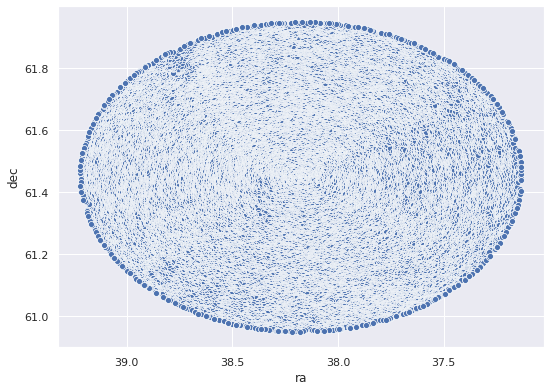

In [22]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [23]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [24]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [27]:
## saving only NGC 2244 data from Cantat

cantat_2244 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_2244")
cantat_2244 = cantat_2244[0].to_pandas()
cantat_2244

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,38.153592,61.130890,465452928793998720,0.3521,-0.476,-0.863,NaN,17.732300,2.5744,0.3,b'IC_1805',38.153596,61.130894
1,38.148031,61.117989,465452894434262528,0.3413,-1.027,-0.231,NaN,16.749500,1.6401,0.3,b'IC_1805',38.148040,61.117990
2,38.253198,61.651232,465540335670181504,0.4672,-0.453,-0.891,NaN,17.607300,2.2985,0.4,b'IC_1805',38.253202,61.651235
3,38.300182,61.354941,465480382225858304,0.3881,-0.664,-0.846,NaN,14.744000,1.1821,1.0,b'IC_1805',38.300188,61.354945
4,38.429289,61.316453,465479248354610944,0.4768,-0.486,-1.095,NaN,17.565599,1.6560,0.4,b'IC_1805',38.429293,61.316458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,38.559873,61.603712,465911562577451264,0.4788,-0.142,-0.669,NaN,17.171600,1.6082,0.2,b'IC_1805',38.559874,61.603715
452,38.242582,61.758806,465917300660039296,0.3388,-1.648,-0.124,NaN,16.572800,1.2593,0.1,b'IC_1805',38.242597,61.758806
453,38.561836,61.703254,465913310627212672,0.4396,-0.690,-0.448,NaN,13.340600,0.8793,0.8,b'IC_1805',38.561842,61.703256
454,38.239475,61.768696,465929047388139008,0.3782,-0.733,0.198,NaN,17.888201,1.8055,0.1,b'IC_1805',38.239482,61.768695


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_2244 = cantat_2244.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_2244 = cantat_2244.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_2244 = all_stars.join(cantat_2244.set_index('source_id'), on='source_id')

In [31]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_2244 = cantat_2244.dropna(subset=['PMemb'])
cantat_2244

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
9,1635721458409799680,b'Gaia DR2 465528726379407232',465528726379407232,584596294,2015.5,38.164814,0.059681,61.449407,0.062212,0.376153,0.079272,4.745121,-0.978910,0.089584,-1.210116,0.129113,-0.014145,-0.029621,-0.738908,0.087967,-0.003134,0.074094,-0.060402,0.004175,0.078398,-0.000019,379,0,378,1,6.278465,571.219360,0.337592,4.655206,31,False,2.403194,1.345949,0.013172,-0.049651,...,15.563552,285.781647,15.641562,1.544088,0,2.251506,1.066038,1.185468,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.721350,0.916426,58.795684,43.506540,102001.0,3579.750000,3425.000000,3892.699951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.004912,0.6
12,1635721458409799680,b'Gaia DR2 465528726370386560',465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,4011.776907,12.408737,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.723230,0.924154,58.805327,43.510325,102011.0,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.005842,0.3
13,1635721458409799680,b'Gaia DR2 465528722079282688',465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,153.224776,313.659210,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.721372,0.923120,58.802553,43.511010,100001.0,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.006048,1.0
16,1635721458409799680,b'Gaia DR2 465528726379401344',465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,351.628832,2154.513672,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.726980,0.925506,58.810177,43.508449,100002.0,6109.666504,5640

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_2244.to_csv('NGC_2244_cantat.csv')
# all_stars.to_csv('NGC_2244_Gaia_30m.csv')

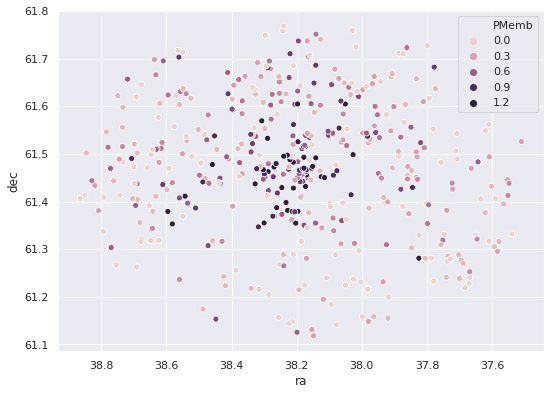

In [35]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_2244['ra'], cantat_2244['dec'], hue = cantat_2244['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_2244

In [37]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,4.560000e+02,4.560000e+02,4.560000e+02,456.0,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.0,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,455.000000,456.000000,4.550000e+02,455.000000,455.000000,455.000000,455.000000,456.000000,455.000000,455.000000,455.000000,5.000000,5.000000,456.000000,5.0,5.00000,5.000000,456.000000,456.000000,456.000000,456.000000,295.000000,295.000000,295.000000,295.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,456.000000,456.000000
mean,1.635721e+18,4.655539e+17,8.425234e+08,2015.5,38.194363,0.050572,61.469439,0.050805,0.429867,0.066834,9.209514,-0.813652,0.076533,-0.415239,0.111228,-0.016119,0.020007,-0.758214,0.048855,0.017473,0.038419,-0.241157,-0.010356,0.048429,-0.002985,390.427632,33.682018,387.605263,2.822368,1.352918,438.117950,0.088376,0.984208,31.0,37.856735,1.460187,0.011189,-0.045117,44.447368,15.344298,...,16.632320,40.633772,7.982626e+04,121.483226,533.133484,15.050078,1.356256,0.100877,1.582248,0.711352,0.870897,-47.089115,2.876392,0.122807,4750.0,2.60000,0.000000,134.726578,0.940617,58.825286,43.518683,100089.352542,4652.797363,4471.136719,4947.840820,2.161606,1.848876,2.521213,1.090662,0.919779,1.280249,200111.0,5.422986,4.849247,5.841270,54.233978,47.036800,61.431141,0.183131,0.402851
std,0.000000e+00,1.045917e+14,4.759046e+08,0.0,0.309459,0.028364,0.139898,0.026952,0.055322,0.036280,5.990383,0.342207,0.043149,0.393607,0.057625,0.106941,0.123021,0.034140,0.089805,0.087815,0.088071,0.137877,0.094699,0.097575,0.088454,40.123699,108.964506,39.861600,4.483085,4.922884,191.730499,0.133437,2.686318,0.0,85.402588,0.083467,0.006123,0.032541,4.464447,1.067960,...,2.061030,6.104194,5.665015e+05,835.927346,425.348358,1.743539,0.101899,0.301497,0.433189,0.249816,0.196185,16.629325,1.743476,1.251920,500.0,0.74162,0.176777,0.141050,0.146783,0.210297,0.134796,411.490667,658.181335,644.544861,685.960144,0.552312,0.550706,0.458787,0.277141,0.274713,0.229367,0.0,6.843469,6.323979,7.256820,279.222290,242.473190,316.016998,0.091110,0.303120
min,1.635721e+18,4.654529e+17,1.440812e+07,2015.5,37.509657,0.012867,61.117989,0.013695,0.330794,0.016679,2.122049,-1.742702,0.019533,-1.281146,0.029553,-0.491299,-0.287339,-0.877849,-0.235854,-0.329891,-0.206680,-0.651846,-0.306789,-0.226258,-0.366241,177.000000,0.000000,167.000000,0.000000,-10.749

In [38]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

pmdec                          -0.546034
dist                           -0.501467
phot_g_mean_mag                -0.496958
phot_rp_mean_mag               -0.496644
phot_bp_mean_mag               -0.493589
                                  ...   
phot_rp_mean_flux_over_error    0.414668
phot_bp_mean_flux_over_error    0.458309
parallax_over_error             0.567977
rv_template_fe_h                0.839061
PMemb                           1.000000
Name: PMemb, Length: 89, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_2244_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_2244_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [41]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_1805_center
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,38.193359,61.469566,0.050410,0.050670,0.429938,0.066683,9.223312,-0.813080,0.076236,-0.413461,0.110918,15.920975,1.582248,0.294089
std,0.309085,0.139988,0.028182,0.026825,0.055362,0.036175,5.989717,0.342366,0.042727,0.392203,0.057307,1.891892,0.433189,0.170812
min,37.509659,61.117989,0.012867,0.013695,0.330794,0.016679,2.122049,-1.742702,0.019533,-1.281146,0.029553,7.878678,0.660330,0.005851
25%,37.979856,61.383936,0.024097,0.025432,0.387940,0.032137,4.342250,-1.039861,0.036034,-0.705837,0.056588,14.877959,1.278863,0.156567
50%,38.191792,61.471245,0.044267,0.046224,0.427990,0.060846,6.827181,-0.794428,0.067035,-0.447824,0.102221,16.581549,1.621187,0.281254
75%,38.394135,61.560301,0.073959,0.070647,0.472544,0.094775,13.196622,-0.602432,0.110742,-0.121365,0.153587,17.329311,1.885611,0.423885
max,38.865101,61.768696,0.138355,0.140115,0.562091,0.164091,27.459866,0.153950,0.200454,0.624587,0.261929,17.994823,2.680638,0.691480


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

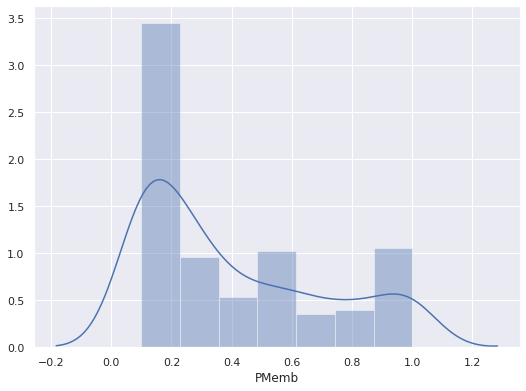

In [43]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [44]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

166

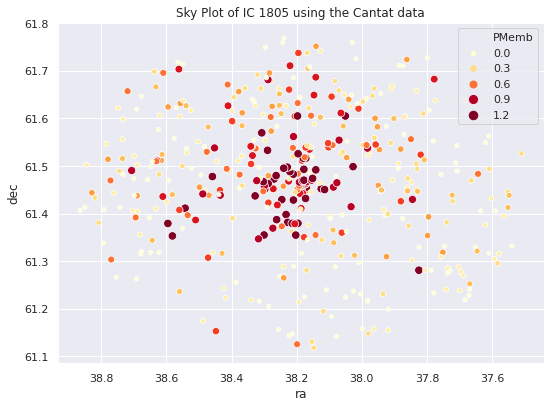

In [45]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 2244 using the Cantat data')
plt.show()

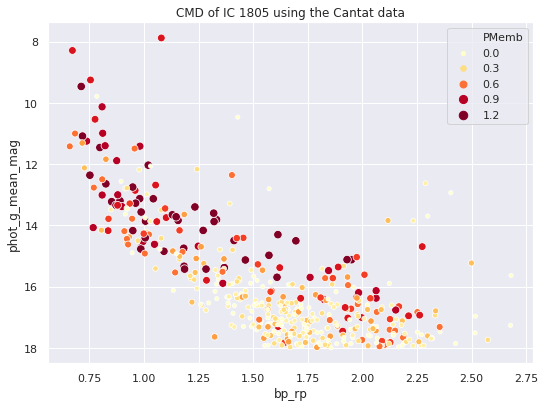

In [46]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 2244 using the Cantat data')
plt.show()

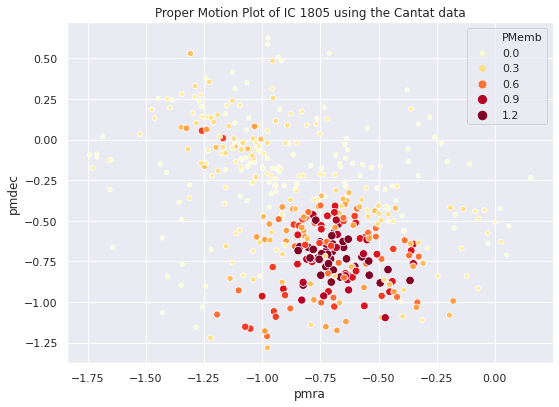

In [47]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 2244 using the Cantat data')
plt.show()

In [48]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec                  0.462763
parallax_over_error    0.141723
pmra                   0.114607
dist_1805_center       0.080442
parallax               0.033114
parallax_error         0.032844
bp_rp                  0.021703
pmdec_error            0.019770
ra_error               0.019194
phot_g_mean_mag        0.018705
dec                    0.017947
ra                     0.017627
pmra_error             0.012034
dec_error              0.007527
dtype: float64

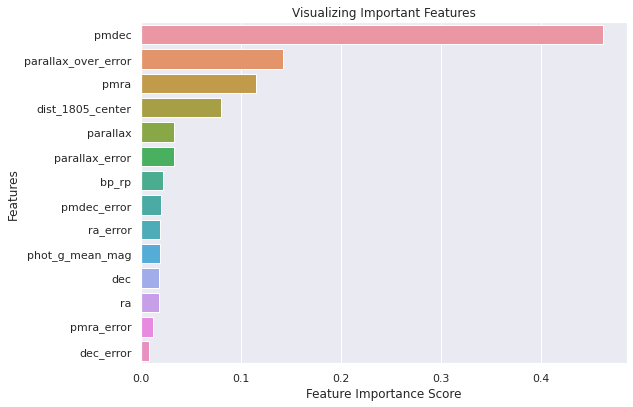

In [50]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [53]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.780161910541454

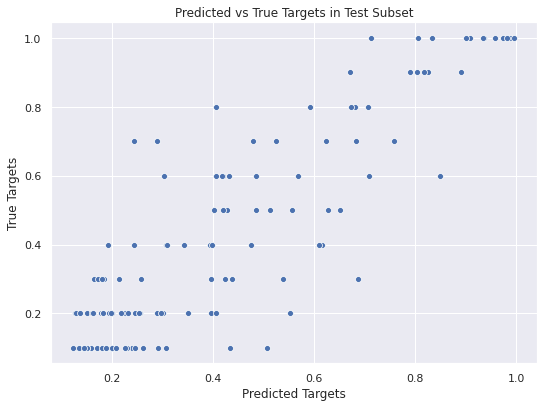

In [55]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [56]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [57]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.43924906612070747, 0.5326080302197999, 0.6250385656143294, 0.6673011917913089, 0.6732256297160111, 0.7151101003247154, 0.7218600806098564, 0.7245847937858306, 0.7432482207716605, 0.7469059484673838, 0.762443892317257, 0.7759333499383013, 0.7838594299656888, 0.7747742883796302, 0.7738534046229707, 0.7798576829153654, 0.7765050194865522, 0.8054140836405711, 0.7941831603567808]


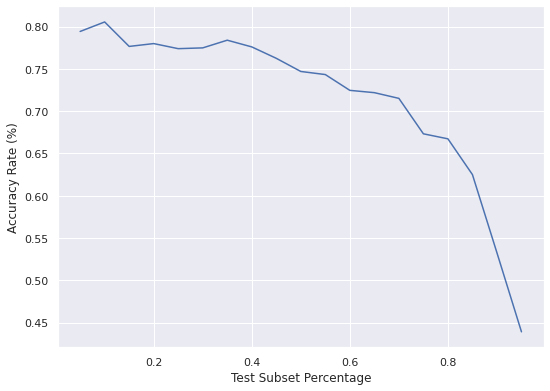

In [58]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [59]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,4.681200e+04,4.681200e+04,4.681200e+04,46812.0,46812.000000,46812.000000,46812.000000,46812.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,46812.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,40181.000000,46812.000000,46812.000000,46812.000000,46812.000000,46812.000000,4.681200e+04,46812.000000,46812.000000,46812.000000,46812.000000,40111.000000,40111.000000,46812.000000,46812.000000,46812.000000,...,40425.000000,40425.000000,46812.000000,4.042500e+04,40425.000000,40425.000000,40425.000000,40421.000000,46812.000000,40421.000000,40425.000000,40425.000000,201.000000,201.000000,46812.000000,201.000000,201.000000,201.000000,46812.000000,46812.000000,46812.000000,46812.000000,4664.000000,4664.000000,4664.000000,4664.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,2832.0,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,46812.000000
mean,1.635721e+18,4.684251e+17,8.435728e+08,2015.5,38.215157,1.132089,61.463628,1.177807,0.437290,0.538219,3.130723,0.019315,0.630468,-0.554804,0.968630,0.018179,0.021782,-0.708923,-0.030021,-0.061464,-0.045382,-0.191169,0.007353,0.088042,-0.001679,318.742032,2.224131,316.740985,2.001047,3.958972,1.142616e+03,1.314079,21.033839,27.033752,2.698454,1.368331,0.088961,-0.025029,36.713877,13.501132,...,60.232407,19.674679,30.517282,6.677510e+03,16.984788,149.431183,17.851082,1.898819,0.076690,1.823853,0.552916,1.270918,-30.656069,1.713726,0.062954,5157.959961,3.432836,-0.059701,134.737771,0.939566,58.834609,43.509369,100515.719983,4321.426758,4128.280762,4645.146484,1.807165,1.553319,2.102910,0.903465,0.772222,1.056689,200111.0,3.185250,2.788216,3.437383,12.118999,10.348266,13.889791,0.326264
std,0.000000e+00,1.127197e+16,4.884421e+08,0.0,0.503686,3.474441,0.249574,3.555813,1.029383,0.487913,10.554957,3.909517,0.589281,3.537268,0.929274,0.242727,0.184260,0.080580,0.134125,0.136502,0.132202,0.206622,0.132895,0.178802,0.135186,121.651444,29.090211,121.038480,2.524338,16.109829,4.386815e+04,2.096229,866.200117,9.763496,20.496147,0.142096,0.076366,0.059851,13.569771,3.528674,...,135.467819,1.479276,15.704336,1.454154e+05,315.639552,243.926636,1.455660,0.564229,0.359524,0.343336,0.417011,0.280693,32.843103,2.511154,1.037127,735.433105,0.615806,0.295031,0.239344,0.250852,0.338080,0.245074,3038.295317,496.167603,511.379059,485.108948,0.712404,0.722977,0.707441,0.360849,0.364648,0.362424,0.0,4.679550,4.144775,5.016409,109.674400,93.488617,126.071274,0.119681
min,1.635721e+18,4.654362e+17,1.500000e+03,2015.5,37.131398,0.012277,60.950223,0.012803,-1

In [0]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_2244_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [63]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


553

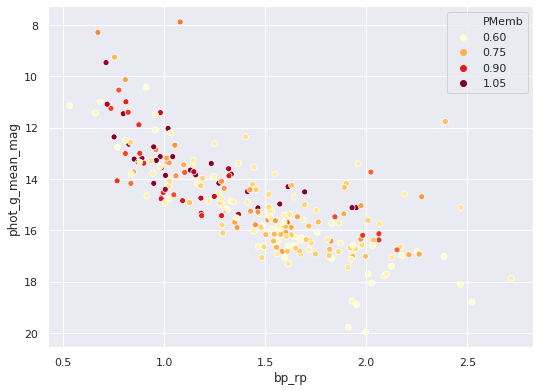

In [85]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.6] )
cmd.invert_yaxis()

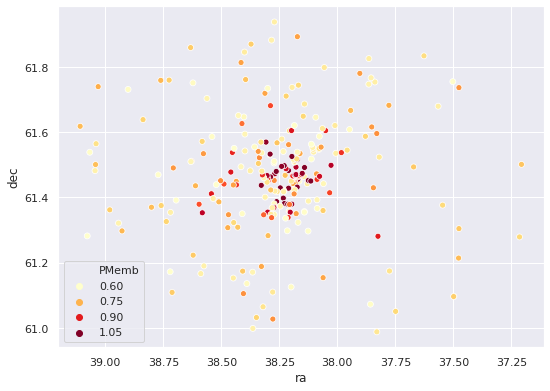

In [86]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.6] )
skyplot.invert_xaxis()

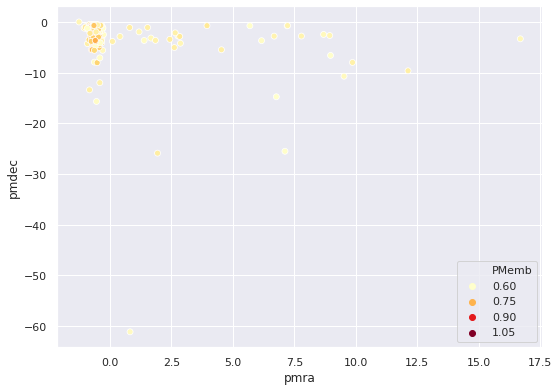

In [84]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.6] )

In [87]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.6]
len(potentialMember)

252

In [88]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1805_center,PMemb
count,2.520000e+02,2.520000e+02,2.520000e+02,252.0,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.0,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,5.000000,5.000000,252.000000,5.000000,5.000000,5.000000,252.000000,252.000000,252.000000,252.000000,236.000000,236.000000,236.000000,236.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,218.0,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,252.000000,252.000000,252.000000
mean,1.635721e+18,4.663264e+17,8.881885e+08,2015.5,38.256325,0.036762,61.468823,0.038922,0.719382,0.049198,19.606775,0.096983,0.055695,-2.406462,0.085633,0.004937,0.057596,-0.756247,0.041321,0.029389,0.019775,-0.287259,-0.039118,0.026844,0.008415,396.924603,50.861111,393.206349,3.718254,0.983410,443.968658,0.075566,1.346130,31.0,61.039387,1.482542,0.008202,-0.040016,45.190476,15.531746,...,41.750000,1.333044e+05,151.929060,774.221741,14.132801,1.344235,0.162698,1.462589,0.645216,0.817372,-25.275401,2.076475,0.246032,5300.000000,3.600000,0.050000,134.754254,0.951367,58.861916,43.505339,100077.487288,4666.311035,4493.981445,4918.794922,1.848327,1.528707,2.158015,0.927267,0.763049,1.090904,200111.0,4.275159,3.878015,4.622471,45.552685,39.847080,51.258247,0.186731,0.282143,0.744468
std,0.000000e+00,6.014869e+15,4.811121e+08,0.0,0.310164,0.039571,0.176070,0.045707,0.551544,0.053187,17.293562,2.376470,0.061954,4.843283,0.097880,0.108427,0.105901,0.037211,0.098250,0.087128,0.087978,0.124100,0.077077,0.090966,0.096648,41.241277,132.244885,41.312784,6.148558,6.320245,230.670059,0.204966,4.665525,0.0,99.943947,0.088122,0.009567,0.032259,4.614569,1.042419,...,6.831276,7.508727e+05,1018.445861,481.230621,1.741579,0.259664,0.369825,0.434279,0.254071,0.233151,20.407810,1.483105,1.821459,836.660034,0.894427,0.111803,0.153476,0.171473,0.210509,0.172136,384.062655,659.844971,650.186401,672.783752,0.666442,0.633921,0.706249,0.341247,0.317818,0.364632,0.0,6.288032,5.939339,6.710777,276.138336,240.133835,312.162018,0.140815,0.232972,0.126632
min,1.635721e+18,4.654452e+17,1.440812e+07,2015.5,37.206294,0.012823,60.988230,0.013618,0.155770,0.016679,0.803183,-1.259174,0.019533,-61.139567,0.029553,-0.491299,-0.233926,-0.877849,-0.210194,-0.243341,-0.363151,-0.651846,-0.220134,-0.216867,-0.366241,253.000000,0.000000,240.00000

In [89]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1805_center
count,4.560000e+02,4.560000e+02,4.560000e+02,456.0,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.0,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,456.000000,4.550000e+02,455.000000,455.000000,455.000000,455.000000,456.000000,455.000000,455.000000,455.000000,5.000000,5.000000,456.000000,5.0,5.00000,5.000000,456.000000,456.000000,456.000000,456.000000,295.000000,295.000000,295.000000,295.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,456.000000,456.000000,456.000000
mean,1.635721e+18,4.655539e+17,8.425234e+08,2015.5,38.194363,0.050572,61.469439,0.050805,0.429867,0.066834,9.209514,-0.813652,0.076533,-0.415239,0.111228,-0.016119,0.020007,-0.758214,0.048855,0.017473,0.038419,-0.241157,-0.010356,0.048429,-0.002985,390.427632,33.682018,387.605263,2.822368,1.352918,438.117950,0.088376,0.984208,31.0,37.856735,1.460187,0.011189,-0.045117,44.447368,15.344298,...,40.633772,7.982626e+04,121.483226,533.133484,15.050078,1.356256,0.100877,1.582248,0.711352,0.870897,-47.089115,2.876392,0.122807,4750.0,2.60000,0.000000,134.726578,0.940617,58.825286,43.518683,100089.352542,4652.797363,4471.136719,4947.840820,2.161606,1.848876,2.521213,1.090662,0.919779,1.280249,200111.0,5.422986,4.849247,5.841270,54.233978,47.036800,61.431141,0.183131,0.402851,0.294479
std,0.000000e+00,1.045917e+14,4.759046e+08,0.0,0.309459,0.028364,0.139898,0.026952,0.055322,0.036280,5.990383,0.342207,0.043149,0.393607,0.057625,0.106941,0.123021,0.034140,0.089805,0.087815,0.088071,0.137877,0.094699,0.097575,0.088454,40.123699,108.964506,39.861600,4.483085,4.922884,191.730499,0.133437,2.686318,0.0,85.402588,0.083467,0.006123,0.032541,4.464447,1.067960,...,6.104194,5.665015e+05,835.927346,425.348358,1.743539,0.101899,0.301497,0.433189,0.249816,0.196185,16.629325,1.743476,1.251920,500.0,0.74162,0.176777,0.141050,0.146783,0.210297,0.134796,411.490667,658.181335,644.544861,685.960144,0.552312,0.550706,0.458787,0.277141,0.274713,0.229367,0.0,6.843469,6.323979,7.256820,279.222290,242.473190,316.016998,0.091110,0.303120,0.170828
min,1.635721e+18,4.654529e+17,1.440812e+07,2015.5,37.509657,0.012867,61.117989,0.013695,0.330794,0.016679,2.122049,-1.742702,0.019533,-1.281146,0.029553,-0.491299,-0.287339,-0.877849,-0.235854,-0.329891,-0.206680,-0.651846,-0.306789,-0.226258,-0.366241,177.000000,0.000000,167.000000,0.000000,-10.7496

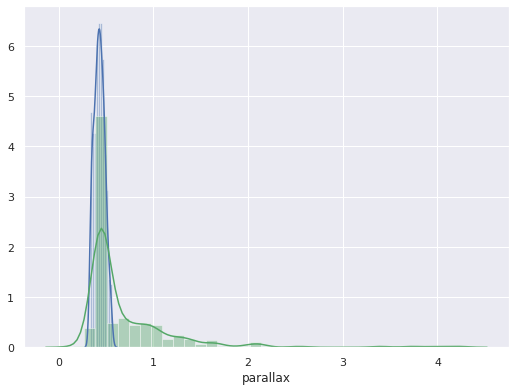

In [90]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_2244_membership_prob.csv')
potentialMember.to_csv('NGC_2244_membership_prob.csv')


### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


In [93]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_1805_center,PMemb,dataset
9,1635721458409799680,b'Gaia DR2 465528726379407232',465528726379407232,584596294,2015.5,38.164814,0.059681,61.449407,0.062212,0.376153,0.079272,4.745121,-0.978910,0.089584,-1.210116,0.129113,-0.014145,-0.029621,-0.738908,0.087967,-0.003134,0.074094,-0.060402,0.004175,0.078398,-0.000019,379,0,378,1,6.278465,571.219360,0.337592,4.655206,31,False,2.403194,1.345949,0.013172,-0.049651,...,15.641562,1.544088,0,2.251506,1.066038,1.185468,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.721350,0.916426,58.795684,43.506540,102001.0,3579.750000,3425.000000,3892.699951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.004912,0.010203,0.611,New_member
13,1635721458409799680,b'Gaia DR2 465528722079282688',465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.721372,0.923120,58.802553,43.511010,100001.0,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.006048,0.007376,0.992,New_member
16,1635721458409799680,b'Gaia DR2 465528726379401344',465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.726980,0.925506,58.810177,43.508449,100002.0,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111.0,14.735189,11.642467,17.291494,272.568817,239.666214,305.471405,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.006811,0.009750,0.845,New_member
29,1635721458409799680,b'Gaia DR2 465528722077526144',465528722077526144,537680023,2015.5,38.181367,0.028767,61.442197,0.030355,0.453761,0.037817,11.998713,-0.542215,0.045610,-0.599020,0.067597,-0.014551,0.115672,-0.686150,0.128594,0.053037,0.100524,-0.214339,-0.124897,-0.041728,0.037988,324,306,315,9,18.035608,1009.378662,0.074506,2.377913,31,False,90.522102,1.565245,0.006710,-0.083890,...,12.058416,1.249682,1,1.053280,0.430085,0.623195,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',134.731412,0.912770,58.801241,43.496624,100002.0,51

In [94]:
concatenated.dataset.value_counts()

New_member    252
Old_member    166
Name: dataset, dtype: int64

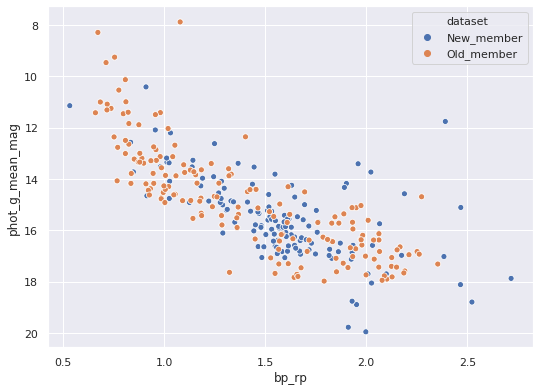

In [95]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

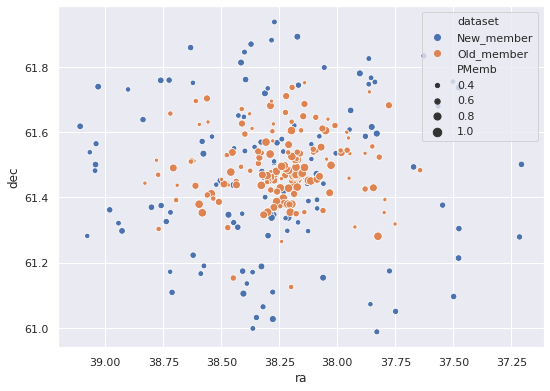

In [96]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

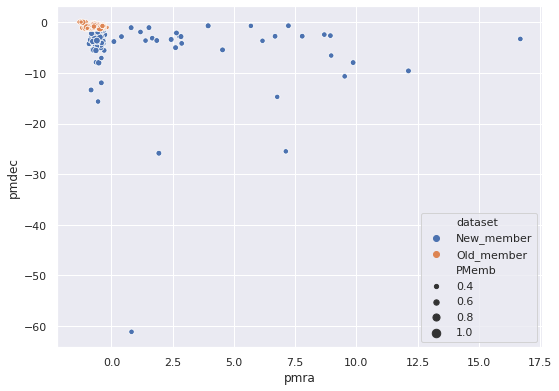

In [97]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)

In [0]:
files.download('NGC_2244_cantat.csv')
files.download('NGC_2244_membership_prob.csv')